<a href="https://colab.research.google.com/github/adiupd123/BIZ-CARD/blob/master/kalman_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

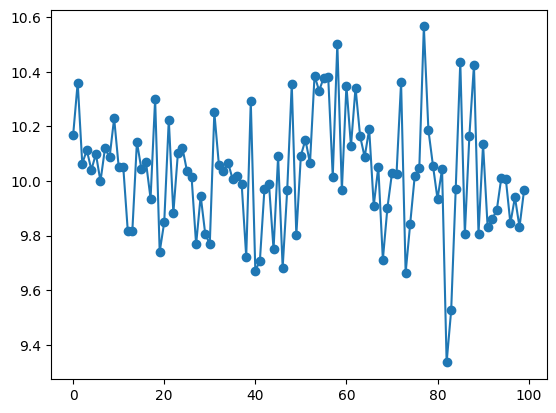

In [4]:
actual_range=10
num_measurements=100
measured_ranges=np.random.normal(actual_range, 0.2, num_measurements)
plt.plot(measured_ranges, 'o-')

In [6]:
# Prediction
# xcap_(k) = A * xcap(k-1) + B * u(k)
# P_(k) = A * P(k-1) * At + Q

# Updation
# K(k) = P_(k)*Ct/(C*P_(k)*Ct + R)
# xcap(k) = xcap_(k) + K(k) (y(k) - C*xcap_)
# P(k) = (I - K(k)*C)*P_(k)

In [10]:
A=2.0
R=0.01    # Measurement Covariance
C = 0.001 # Process Covariance
#x=np.zeros(num_measurements)
xcap=np.zeros(num_measurements)
P=np.zeros(num_measurements)
xcap_=np.zeros(num_measurements)
P_=np.zeros(num_measurements)
K=np.zeros(num_measurements)

# Initial values
xcap[0]=0
P[0]=0.2

In [31]:
for i in range (1,num_measurements):
  xcap_[i] = A * xcap[i-1]
  P_[i] = A * P[i-1] + C
  K[i] = P_[i] / (P_[i] + R)
  xcap[i] = xcap_[i] + K[i] * (measured_ranges[i] - xcap_[i])
  P[i] = (1 - K[i]) * P_[i]

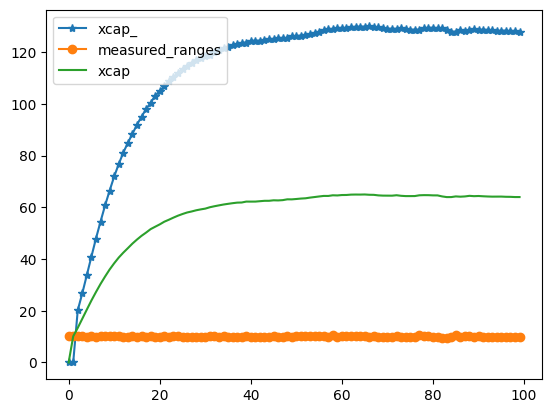

In [32]:
# Plotting estimates with measured ranges
plt.plot(xcap_, "*-", label="xcap_")
plt.plot(measured_ranges, "o-", label="measured_ranges")
plt.plot(xcap, label="xcap")
plt.legend()

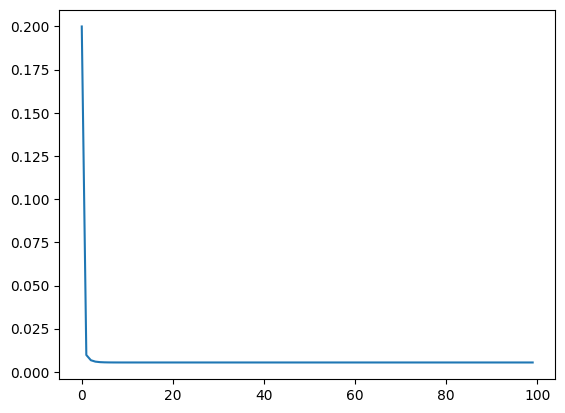

In [33]:
plt.plot(P)